# SPECIO

In [1]:
%%HTML
<button id="do_run_all">Start</button>
<script>
$("#do_run_all").click(
    function () {
        $("#run_all_cells").click();
    }
);
</script>

In [2]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%matplotlib notebook
from IPython.display import HTML, display, clear_output, Javascript
import ipywidgets as widgets
import specio
import os
from glob import glob
import pandas as pd
import numpy as np

In [5]:
display(HTML('''<style>.widget-label { min-width: 20ex !important; }</style>''')) #widget label width
display(HTML("<style>.container { width:100% !important; }</style>")) #cell width

In [6]:
#::: show overview checkbox widget    
show_overview_w = widgets.Checkbox(
    value = True,
    description='Show overview plots'
)
#bool_show_overview = show_overview_w.value
    
    
    
#::: show stats checkbox widget    
show_stats_w = widgets.Checkbox(
    value = False,
    description='Show observing stats table'
)
#bool_show_stats = show_stats_w.value


#::: show ACP pointing checkbox widget    
show_ACP_pointing_w = widgets.Checkbox(
    value = False,
    description='Show ACP pointing plot'
)
#bool_show_ACP_pointing_plot = show_ACP_pointing_w.value
    
    

#::: telescope drowndown widget
telescope_w = widgets.Dropdown(
    options=['Io','Europa','Callisto','Ganymed'],
    value='Callisto',
    description='Telescope'
)
#display(telescope_w)


#::: read available fields and filters for this telescope
def get_field_and_filter_w_options():
    telescope = telescope_w.value
    try:
        buf = glob( os.path.join(specio.root(telescope), '*_output.fts') )
        fields_and_filters = [ item.split('/')[-1][0:-11] for item in buf ]
        return fields_and_filters
    except:
        return ['No data available']


#::: fields and filters dropdown widget
field_and_filter_w = widgets.Dropdown(
    options=get_field_and_filter_w_options(),
    description='Fields and filters'
)
#display(field_and_filter_w)
#field_name, filter_band = field_and_filter_w.value.split('_')


#::: read available obj_ids for this telescope, field and filter
def get_obj_id_w_options():
    telescope = telescope_w.value
    try:
        field_name, filter_band = field_and_filter_w.value.split('_')
        dic = specio.get(telescope, field_name, filter_band, ['OBJ_ID'], silent=True)
        obj_ids = list(dic['OBJ_ID'])
        return obj_ids
    except:
        return ['No data available']
        

#::: OBJ_IDs dropdown widget
obj_id_w = widgets.Dropdown(
    options=get_obj_id_w_options(),
    description='Object ID'
)
#display(obj_id_w)
#obj_id = obj_id_w.value


#::: read available obj_ids for this telescope, field and filter
def get_date_w_options():
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        dic = specio.get(telescope, field_name, filter_band, ['STATS'], silent=True)
        #print dic
        dates = ['all'] + list(dic['STATS'][0])
        Nimages = [str(np.sum(dic['STATS'][1]))] + [ str(item) for item in dic['STATS'][1] ]
        date_Nimages = [ item0+'    ('+item1+' img)' for item0, item1 in zip(dates, Nimages)   ]
        return date_Nimages
    except:
        return ['No data available']
        

#::: date dropdown widget
date_w = widgets.Dropdown(
    options=get_date_w_options(),
    description='Date'
)
#display(date_w)
#date = date_w.value


def get_output_w_value():
    try:
        dic = specio.get(telescope_w.value, field_and_filter_w.value.split('_')[0], field_and_filter_w.value.split('_')[1], ['STATS'], silent=True)
        return str(len(dic['STATS'][0])) + ' nights, ' + str(np.sum(dic['STATS'][1])) + ' images'
    except:
        return 'No data available'
    

#::: stats output widget
output_w = widgets.Text(
    value=get_output_w_value(),
    placeholder='',
    description='    ',
    disabled=True
)


#::: selection changes, update dropdown menus
def update(b):
    #bool_show_overview = show_overview_w.value
    #bool_show_stats = show_stats_w.value
    #bool_show_ACP_pointing_plot = show_ACP_pointing_w.value
    
    field_and_filter_w.options = get_field_and_filter_w_options()
    obj_id_w.options = get_obj_id_w_options()
    date_w.options = get_date_w_options()
    output_w.value = get_output_w_value()
    
    #run_all()
    
    
#::: selection changes, update dropdown menus
show_overview_w.observe(update)
show_stats_w.observe(update)
show_ACP_pointing_w.observe(update)
telescope_w.observe(update)
field_and_filter_w.observe(update)
obj_id_w.observe(update)
date_w.observe(update)



#::: combine all widgets in an hbox
hbox1 = widgets.HBox([show_overview_w, show_stats_w, show_ACP_pointing_w])
hbox2 = widgets.HBox([telescope_w, field_and_filter_w, obj_id_w, date_w, output_w])


#::: display all widgets
display(hbox1)
display(hbox2)

SEJveChjaGlsZHJlbj0oQ2hlY2tib3godmFsdWU9VHJ1ZSwgZGVzY3JpcHRpb249dSdTaG93IG92ZXJ2aWV3IHBsb3RzJyksIENoZWNrYm94KHZhbHVlPUZhbHNlLCBkZXNjcmlwdGlvbj11J1PigKY=


SEJveChjaGlsZHJlbj0oRHJvcGRvd24oZGVzY3JpcHRpb249dSdUZWxlc2NvcGUnLCBpbmRleD0yLCBvcHRpb25zPSgnSW8nLCAnRXVyb3BhJywgJ0NhbGxpc3RvJywgJ0dhbnltZWQnKSwgdmHigKY=


In [35]:
#::: run all cells below the run button cell
def run_all(b):
    #print bool_show_overview 
    #print show_overview_w.value
    #print 'HELLO' 
    display(Javascript('IPython.notebook.execute_cells_below()'))

#::: run button
button = widgets.Button(description="Query")
display(button)
button.on_click(run_all)

<IPython.core.display.Javascript object>

Button(description=u'Query', style=ButtonStyle())

## Overview plots

Callisto Sp0544-2433 I+z SP000000 all 



<IPython.core.display.Javascript object>


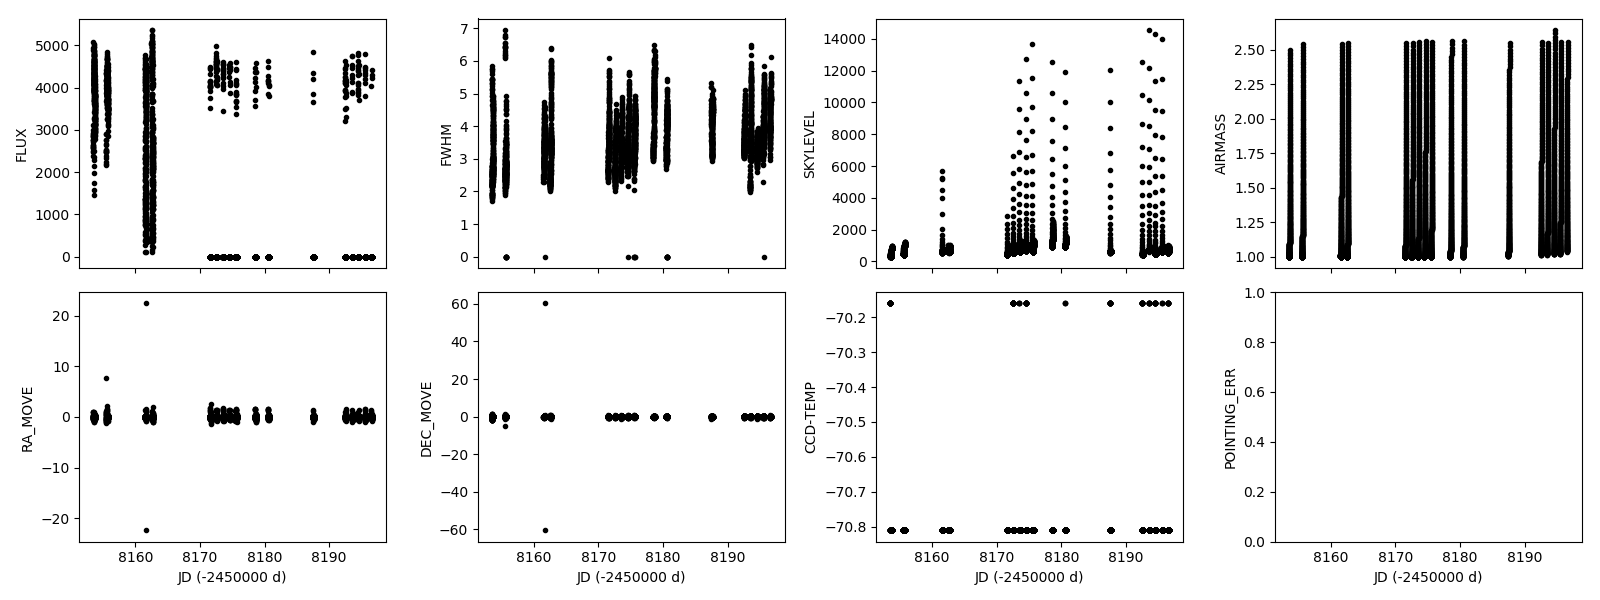

In [36]:
#::: run
def show_overview():
    clear_output()
    #display(hbox)  
    #display(telescope_w)
    #display(field_and_filter_w)
    #display(obj_id_w)
    #display(date_w)
    #display(button)
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value[0:10]
        if date[0:3] == 'all': date = 'all'
        print telescope, field_name, filter_band, obj_id, date, '\n'
        if date=='all':
            fig_overview, axes_overview = specio.plot_overview(telescope, field_name, filter_band, obj_id=obj_id)
        else:   
            fig_overview, axes_overview = specio.plot_overview(telescope, field_name, filter_band, obj_id=obj_id, time_date=date)
    except:
        print("No data available")
    
        
#::: run button
#button = widgets.Button(description="Show")
#display(button)
#button.on_click(run)

#print bool_show_overview

if show_overview_w.value:
    show_overview()
else:
    clear_output()

## Observing stats table

In [37]:
#################################################################################
#::: Observing stats table
##################################################################################

'''
#::: info widget
def get_stats_info_w_value():
    try:
        return 'Observing table for ' + telescope_w.value + ', ' + field_and_filter_w.value.split('_')[0] + ', ' + field_and_filter_w.value.split('_')[1]
    except:
        return 'No data available'
    

#::: info widget
stats_info_w = widgets.Text(
    value=get_stats_info_w_value(),
    placeholder='',
    description='    ',
    disabled=True,
    layout=widgets.Layout(width='1000px')
)
'''

#::: print stats as html table
def print_stats_html_table(telescope, field_name, filter_band):
    dic = specio.get(telescope, field_name, filter_band, ['STATS'], silent=True)
    pdic = pd.DataFrame( data={'DATE':dic['STATS'][0], 'NUM_IMAGES':dic['STATS'][1]} )
    display(pdic)

    
#::: show stats
def show_stats():
    clear_output()
    #display(stats_info_w)
    #display(stats_info_button)
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value[0:10]
        if date[0:3] == 'all': date = 'all'
        print_stats_html_table(telescope, field_name, filter_band)
    except:
        pass
    

#stats_info_button = widgets.Button(description="Show", label="blabla")
#stats_info_button.on_click(show_stats)

#display(stats_info_w)
#display(stats_info_button)

if show_stats_w.value:
    show_stats()
else:
    clear_output()

## ACP pointing

In [38]:
#################################################################################
#::: ACP pointing
#################################################################################

'''
#::: info widget
def get_ACP_info_w_value():
    try:
        return 'Show ACP pointing error for ' + telescope_w.value
    except:
        return 'No data available'
    

#::: info widget
ACP_info_w = widgets.Text(
    value=get_ACP_info_w_value(),
    placeholder='',
    description='    ',
    disabled=True,
    layout=widgets.Layout(width='1000px')
)
'''


#::: show ACP pointing plot
def show_ACP_pointing_plot():
    clear_output()
    #display(ACP_info_w)
    #display(ACP_info_button)
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value[0:10]
        if date[0:3] == 'all': date = 'all'
        if date=='all':
            specio.plot_ACP_pointing(telescope)
        else:
            specio.plot_ACP_pointing(telescope,time_hjd=date)
    except:
        pass
    

#::: run button
#ACP_info_button = widgets.Button(description="Show")
#ACP_info_button.on_click(show_ACP_pointing_plot)


#display(ACP_info_w)
#display(ACP_info_button)

if show_ACP_pointing_w.value:
    show_ACP_pointing_plot()
else:
    clear_output()